<a href="https://colab.research.google.com/github/alexquar/Pytorch-Learning/blob/main/convolutionalNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional NN



*   good at classifying images
*   mnist, data set of handwritten images of numbers
* perform feature extraction through map layers that finished with a flatten layer that is like our input layer for the previous simple NN that we can feed into our neurons and get an output from
* we have images of black numbers on white numbers, we take white to be zero and black/gray to be different doubles up to and including 1
* colors would usually go up 255 and are more complex because they're basically 3d tensors, they have height, width and color where color is also 3 channels: RGB

* CNN are locally connected instead of gloablly to make computer time less (connected to a couple neurons instead of ~all
* since there can be so much data this is more efficinet





#Convolution


*   take image passages as a matrix and multiply each entry with a kernal/filter matrix
*   we can then sum up all the values and get a single value to represent tthat section
* we can do this for the entire image and get something new (similar process for bluring)
* the kernal will be altered by the CNN as it learns to get more accurte results

# Pooling
* down/subsampling after convolution to reduce inputers
* max (take biggest of group, lose some info) or average (average all things in group) are common
* can easily go convolution, pooling, convolution, pooling and so on or do whatever system works best for you



In [1]:
#inports
import torch as pt
import torch.nn as nn
import torch.nn.functional as F

#image imports
from torchvision import datasets, transforms
from torchvision.utils import make_grid

#pt data loader
from torch.utils.data import DataLoader

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#convert images into 4 dimension tensor height, width, #images, color
transform = transforms.ToTensor()

#dataset is already from torch vision datasets and save it to data
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 3985689.08it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 485946.19it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4383702.59it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4972730.04it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
#load data
train_loader  = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader   = DataLoader(test_data, batch_size=10, shuffle=False)

# CNN Description


* 2 convolutional layers
*   List item



In [4]:

#convolutional layers
#inputs, outputs, size of slices, step after each slice
conv1 = nn.Conv2d(1,6,3,1)
conv2 = nn.Conv2d(6,16,3,1)

for i, (X_train, y_train) in enumerate(train_data):
  break

print(X_train.shape)

#put our training in correct format
x = X_train.view(1,1,28,28)
x = F.relu(conv1(x)) #rectified linear unit for activation function, pass in our first convolution

#has 1 image, 6 filters, 26x26 image which has dropped outer pixels because there is no real info


torch.Size([1, 28, 28])


In [5]:
#pass through pooling layer
x = F.max_pool2d(x,2,2) #kernal of 2, stride 2

#13x13 expected since we take a matrix of 2x2 and get that down to one and since 26/2=13 we end up with a 13x13 matrix

In [6]:
#convolution 2
x=F.relu(conv2(x))


In [7]:
x=F.max_pool2d(x,2,2) #pool #2

## Building our CNN


*   now we know how our model works we can build our model
* after this we canm do some training and actually test




In [8]:
#build model

class cnn(nn.Module):

  #constructor
  def __init__(self):
    super().__init__()
    #convolutions
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    #layers
    self.fc1 = nn.Linear(5*5*16,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)
  def forward(self,x):
    x = F.relu(conv1(x)) #rectified linear unit for activation function, pass in our first convolution
    x = F.max_pool2d(x,2,2) #kernal of 2, stride 2
    x=F.relu(conv2(x))
    x=F.max_pool2d(x,2,2) #pool #2

    #flatten out, -1 to vary batch size
    x = x.view(-1,16*5*5)

#relu through layers
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return F.log_softmax(x, dim=1)

In [9]:
#instance of model and seed
model = cnn()
pt.manual_seed(69)

#loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = pt.optim.Adam(model.parameters(), lr=0.001)


In [11]:
#train and test model
import time
start_time = time.time()


#create variables for tracking
iterations = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(iterations):
  train_correct_count = 0
  for b, (X_train, Y_train) in enumerate(train_loader):
      b+=1
      Y_pred = model(X_train) #make predictions based on training set
      loss = criterion(Y_pred, Y_train) #how off are we
      predicted = pt.max(Y_pred.data,1)[1] #add up correct preds
      batch_correct = (predicted == Y_train).sum() #how many we got right
      train_correct_count += batch_correct #add to training correct answers

      #update params
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      #print results
      if b%600 == 0:
        print(f'epoch: {i} batch: {b} loss: {loss.item()}')

  #append to lists of stuff
  train_losses.append(loss)
  train_correct.append(train_correct_count)

current_time = time.time()
total = (current_time - start_time)/60
print(total)

epoch: 0 batch: 600 loss: 0.12097126245498657
epoch: 0 batch: 1200 loss: 0.23136253654956818
epoch: 0 batch: 1800 loss: 0.11836560815572739
epoch: 0 batch: 2400 loss: 0.017648790031671524
epoch: 0 batch: 3000 loss: 0.13739079236984253
epoch: 0 batch: 3600 loss: 0.04319649189710617
epoch: 0 batch: 4200 loss: 0.12659785151481628
epoch: 0 batch: 4800 loss: 0.5736958384513855
epoch: 0 batch: 5400 loss: 0.33827659487724304
epoch: 0 batch: 6000 loss: 0.2703401744365692
epoch: 1 batch: 600 loss: 0.010266704484820366
epoch: 1 batch: 1200 loss: 0.0013870114926248789
epoch: 1 batch: 1800 loss: 0.012117983773350716
epoch: 1 batch: 2400 loss: 0.04055837541818619
epoch: 1 batch: 3000 loss: 0.0019079362973570824
epoch: 1 batch: 3600 loss: 0.0006435824907384813
epoch: 1 batch: 4200 loss: 0.04300552234053612
epoch: 1 batch: 4800 loss: 0.022211894392967224
epoch: 1 batch: 5400 loss: 0.05139975622296333
epoch: 1 batch: 6000 loss: 0.01739334501326084
epoch: 2 batch: 600 loss: 0.7039722204208374
epoch: 2 

In [22]:
#test
with pt.no_grad():
  total_tests = 0
  total_correct = 0
  for b, (X_test, Y_test) in enumerate(test_loader):
    Y_pred = model(X_test)
    predicted = pt.max(Y_pred.data,1)[1] #add up correct preds
    total_correct = (predicted == Y_test).sum() #how many we got right
    total_tests+=1

loss = criterion(Y_pred, Y_test)
test_losses.append(loss)
print(total_tests, total_correct)


1000 tensor(9)


Text(0, 0.5, 'loss')

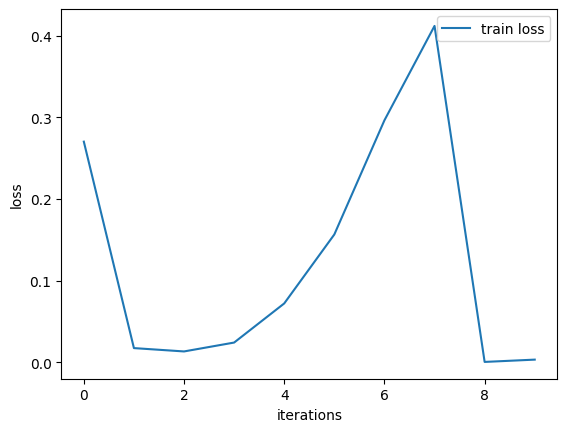

In [29]:
#graph results, loss at each iteration
#train_losses = [t.item() for t in train_losses]
plt.plot(train_losses, label='train loss')
plt.legend()
plt.xlabel('iterations')
plt.ylabel('loss')

Text(0, 0.5, 'correct')

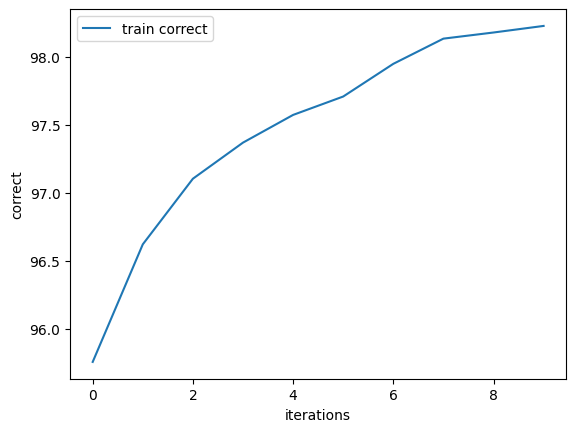

In [31]:
#accuracy percentage
plt.plot([t/600 for t in train_correct], label='train correct')
plt.legend()
plt.xlabel('iterations')
plt.ylabel('correct')

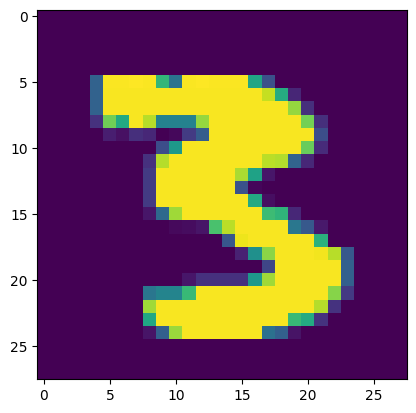

In [47]:
#have the cnn actually tell us what it is on random image
import random
n = random.randint(0,1000)
test_data[n][0].reshape(28,28)
plt.imshow(test_data[n][0].reshape(28,28))

In [48]:
#pass
model.eval()#SETS IN EVAL MODE
with pt.no_grad():
  new_prediction = model(test_data[n][0].view(1,1,28,28))
  print(pt.max(new_prediction.data,1)[1])

tensor([3])


# Results

* Here you will see if the model was correct based on the number prediction
* This model appears to be more than 98 percent accurate based on iterations and inputs
* Will certainly improve with more epochs and changes to methods